In [15]:
%matplotlib inline

import pandas as pd
from functools import reduce
import numpy as np
from scipy.signal import resample

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [8.0, 4.0]

features=['x','y','pen_up','pressure']
#features=['x','y']
N = 50
s = 1

In [2]:
labels = pd.read_csv("/data/elekin/data/results/handwriting/binary_labels_20220903.csv", index_col=0)
labels.columns = ['labels']
y = (labels == 'si').astype('int8').sort_index()
y.value_counts()

labels
0         29
1         24
dtype: int64

In [3]:
y.index

Index(['C01_1', 'C01_2', 'C02_1', 'C02_2', 'C03_1', 'C03_2', 'C04_1', 'C04_2',
       'C05_1', 'C05_2', 'C06_1', 'C06_2', 'C07_1', 'C07_2', 'C08', 'C101_1',
       'C101_2', 'C102_1', 'C102_2', 'C103_1', 'C103_2', 'C104_1', 'C104_2',
       'C106_1', 'C106_2', 'C107_1', 'C107_2', 'T001', 'T002_1', 'T002_2',
       'T005', 'T006', 'T007', 'T008', 'T009', 'T010', 'T011_1', 'T011_2',
       'T012_1', 'T012_2', 'T013', 'T014', 'T015', 'T018', 'T021', 'T023_1',
       'T023_2', 'T025', 'T026', 'T027', 'T028_1', 'T028_2', 'T029'],
      dtype='object', name='name')

In [4]:
plt.style.use('fivethirtyeight')

In [9]:
df = pd.read_csv("/data/elekin/data/results/handwriting/tmp/archimedes_20220912.csv", index_col=0).set_index('subject_id')
df.head()

,x,y,timestamp,pen_up,azimuth,altitude,pressure
subject_id,,,,,,,
C107_2,3880,5330,1368624260328,1,120,590,1229
C107_2,3870,5330,1368624260359,1,120,590,1229
C107_2,3870,5330,1368624260531,0,120,590,0
C107_2,5310,7740,1368624263405,0,120,590,0
C107_2,5306,7747,5208200,0,2620,520,0


In [16]:
df.describe()

,x,y,timestamp,pen_up,azimuth,altitude,pressure
count,135499.000000,135499.000000,1.354990e+05,135499.000000,135499.000000,135499.000000,135499.000000
mean,4904.840936,6158.333102,9.831683e+10,0.894294,1377.699466,718.012458,1072.450830
std,1157.257460,2793.955390,3.507142e+11,0.307462,1048.892591,108.320350,535.279585
min,557.000000,1426.000000,1.264550e+05,0.000000,0.000000,220.000000,0.000000
25%,4564.000000,3337.000000,1.774008e+06,1.000000,280.000000,660.000000,837.000000
50%,5139.000000,7038.000000,2.331650e+06,1.000000,1560.000000,740.000000,1131.000000
75%,5610.000000,8460.000000,4.259958e+06,1.000000,1950.000000,790.000000,1443.000000
max,7198.000000,12317.000000,1.368624e+12,1.000000,3590.000000,900.000000,2048.000000


Text(0, 0.5, 'y')

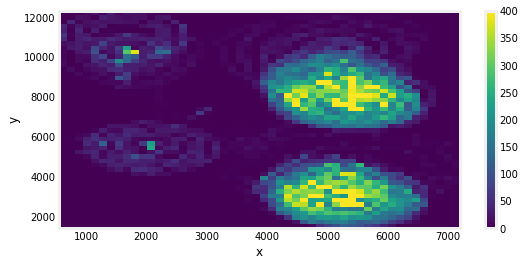

In [24]:
plt.hist2d(df['x'], df['y'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

In [28]:
arr = np.array(df[features].groupby('subject_id').apply(resample,4096).tolist())
arr.shape

(53, 4096, 4)

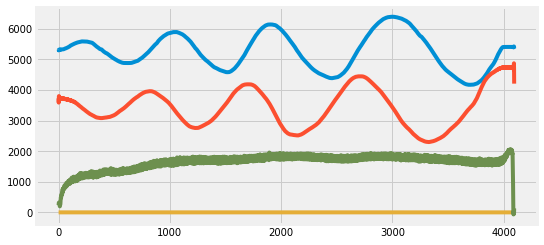

In [29]:
_ = plt.plot(arr[0,:,:])

In [10]:
df_r = pd.read_csv("/data/elekin/data/results/handwriting/tmp/radius_20220912.csv", index_col=0).T
df_r = df_r.sort_index()
df_r.head(2)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
C01_1,0.0,139.620900,12.303175,74.603526,11.278530,53.647830,16.991655,35.022860,12.339670,32.053996,...,997.487787,979.175270,1034.235620,1066.965460,999.014689,942.927995,1036.912911,1151.298834,982.072539,483.010809
C01_2,0.0,177.638597,0.390007,98.670267,1.486433,65.696246,1.468200,53.061058,2.555435,38.790364,...,1301.393575,1251.307658,1302.797461,1369.075476,1301.355801,1204.302986,1303.042299,1478.651430,1298.856321,648.930921


In [20]:
df_r.shape

(53, 4096)

In [11]:
df_rr = pd.read_csv("/data/elekin/data/results/handwriting/tmp/rolling_radius_std__20220912.csv")
df_rr.T.sample(2)

,0,1,2,3,4,5,6,7,8,9,...,3831,3832,3833,3834,3835,3836,3837,3838,3839,3840
T028_1,1457.934892,1456.388572,1457.283224,1463.629066,1470.480567,1477.042598,1482.276248,1487.529500,1492.653755,1498.086400,...,172.309450,176.679361,179.651296,183.779250,189.443594,192.236279,201.582688,202.790573,216.410676,216.531678
C106_1,326.479438,269.430566,220.886100,212.413636,212.037312,213.656133,215.376421,217.006322,219.062042,221.072171,...,97.165179,96.712625,96.283184,95.895439,95.505957,95.173984,94.918987,94.439242,95.162628,95.204652


In [14]:
df_r_w = pd.read_csv("/data/elekin/data/results/handwriting/tmp/windowed_data_augmentation_radius__20220912.csv")

In [22]:
df_r_w.shape

(214491, 50)

In [11]:
df_r_w.join(y).labels.shape

(214491,)

In [49]:
df_rr_w = pd.read_csv("/data/elekin/data/results/handwriting/tmp/windowed_data_augmentation_rolling_radius__20220911.csv", index_col=0)
df_rr_w.sample(2)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
T002_2,102.252570,103.511333,104.587849,105.478341,106.185142,106.725765,107.127039,107.411388,107.593486,107.688043,...,104.265846,104.669642,105.142134,105.675803,106.260428,106.884216,107.536963,108.207439,108.879118,109.534977
T025,182.172057,182.860635,183.642685,184.284564,185.011906,185.597272,186.268955,186.802752,187.422492,187.936540,...,204.828324,204.911055,205.039160,205.063780,205.129479,205.095234,205.104893,205.010210,204.957565,204.809066


In [19]:
df_rd = pd.read_csv("/data/elekin/data/results/handwriting/tmp/residues_17_20220911.csv", index_col=0)
df_rd.T.sample(2)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
T023_2,0.0,287.360089,272.470126,149.561298,64.294600,39.694990,34.746784,142.797907,122.920866,440.872247,...,3737.457754,3716.314271,3568.399092,3896.930915,3529.071655,3763.097270,3853.763733,3333.724139,4365.212170,2834.567758
T006,0.0,1371.234418,192.804001,2180.311620,3899.101943,4341.325352,4130.362980,3989.881550,4040.363182,4089.532792,...,4343.123959,4310.357063,4505.093424,4604.202436,4355.161516,4172.605004,4592.514707,5137.784930,4402.001784,1923.261705


In [20]:
df_rd.T.index

Index(['C01_1', 'C01_2', 'C02_1', 'C02_2', 'C03_1', 'C03_2', 'C04_1', 'C04_2',
       'C05_1', 'C05_2', 'C06_1', 'C06_2', 'C07_1', 'C07_2', 'C08', 'C101_1',
       'C101_2', 'C102_1', 'C102_2', 'C103_1', 'C103_2', 'C104_1', 'C104_2',
       'C106_1', 'C106_2', 'C107_1', 'C107_2', 'T001', 'T002_1', 'T002_2',
       'T005', 'T006', 'T007', 'T008', 'T009', 'T010', 'T011_1', 'T011_2',
       'T012_1', 'T012_2', 'T013', 'T014', 'T015', 'T018', 'T021', 'T023_1',
       'T023_2', 'T025', 'T026', 'T027', 'T028_1', 'T028_2', 'T029'],
      dtype='object')

In [21]:
df_rd.T.shape

(53, 4096)

In [13]:
df_rrd = pd.read_csv("/data/elekin/data/results/handwriting/tmp/rolling_residues_std_17_20220911.csv").astype(np.float32)
df_rrd.T.sample(2)

,0,1,2,3,4,5,6,7,8,9,...,3831,3832,3833,3834,3835,3836,3837,3838,3839,3840
T012_1,597.087097,571.246704,550.468079,523.651978,497.697693,468.395752,436.779846,403.193146,364.264221,324.947998,...,316.108093,318.258545,320.858490,323.229828,324.848328,326.417328,329.331360,333.357269,334.615082,334.527222
C04_2,35.944809,35.577999,35.742931,35.936253,35.952461,35.766541,35.838917,35.864929,35.740475,35.639999,...,26.056406,26.080194,26.145193,26.211395,26.215984,26.234146,26.279501,26.274902,26.741470,30.045965


In [53]:
df_rd_w = pd.read_csv("/data/elekin/data/results/handwriting/tmp/windowed_data_augmentation_residues_17_20220911.csv", index_col=0)
df_rd_w.sample(2)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
T023_2,55.874703,55.778187,55.506910,55.088097,54.616487,54.199545,53.743313,53.271750,52.823375,52.289733,...,57.681527,58.409279,59.037949,59.73353,60.400830,61.043486,61.709334,62.295933,62.922082,63.505937
T012_2,26.867763,26.991068,27.141084,27.303290,27.473099,27.641472,27.800328,27.946955,28.080257,28.220050,...,31.187424,31.254700,31.327724,31.41051,31.494378,31.574254,31.656197,31.747865,31.840090,31.911237


In [54]:
df_rrd_w = pd.read_csv("/data/elekin/data/results/handwriting/tmp/windowed_data_augmentation_rolling_residues_17_20220911.csv", index_col=0)
df_rrd_w.sample(2)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
T025,23.293871,23.294565,23.294543,23.293993,23.287696,23.281821,23.276939,23.274946,23.274344,23.274101,...,23.301922,23.241295,23.157172,23.043143,22.908331,22.747500,22.566735,22.361779,22.137662,21.881274
T014,69.927261,69.287105,68.664342,68.053092,67.448746,66.858013,66.284019,65.718870,65.158715,64.608456,...,52.146472,51.895615,51.645014,51.398216,51.162348,50.934966,50.712428,50.500941,50.307176,50.128178
